In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [177]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [178]:
bikes = pd.read_csv('day.csv')

## 1. Data Exploration

In [179]:
bikes.shape

(730, 16)

In [180]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [181]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [182]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [183]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Data is correct no null value records or columns to be removed.** 

## 2. Data Preparation


In [184]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
#removing column instant as it is index column
bikes.drop(["instant"], axis=1, inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [186]:
#removing column dteday as it can be derived using columns 'yr' and 'mnth'
bikes.drop(["dteday"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
#removing columns 'casual' and 'registered'
#It is not relevant in current analysis whether customer who rented bike is of type casual or registered.
bikes.drop(["casual", "registered"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Categorical data conversion using data dictionary 

Categorical columns has nominal values (say 0, 1, 2..) instead of specific values and it will be helpful in better understanding of dataset to replace it with actual string values.

In [188]:
bikes["season"].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [189]:
bikes['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [190]:
bikes['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [192]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [193]:
bikes[['temp','atemp','hum','windspeed','cnt']]=bikes[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [194]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


## Data Visualization

* Pairplot for continous variables
* Boxplot for categorical variables


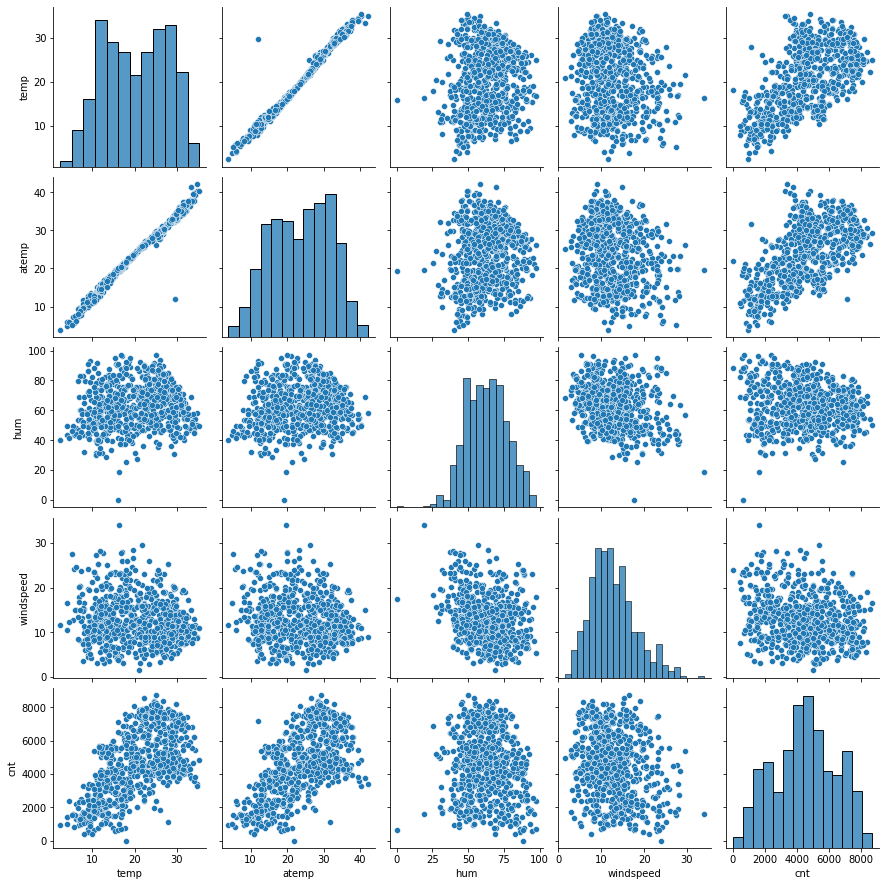

In [195]:
sns.pairplot(bikes, vars=["temp", "atemp","hum", "windspeed", "cnt"])
plt.show()

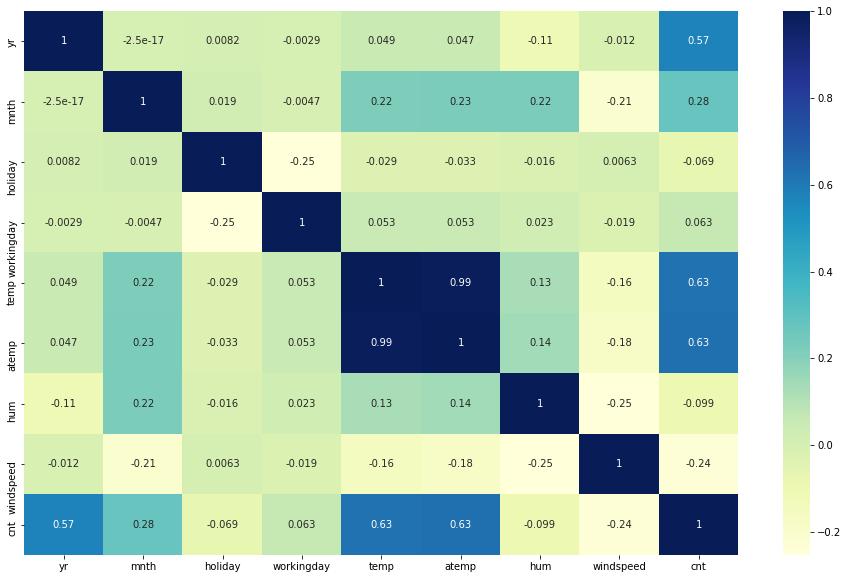

In [196]:
plt.figure(figsize=(16,10))
sns.heatmap(bikes.corr(), annot=True, cmap="YlGnBu")
plt.show()

**columns "temp" and "atemp" are correlated which is quantified by heatmap and visualized in pairplot**


**columns "temp", "windspeed"  are correlated with target variable "cnt".**


In [197]:
#dropping column "temp"
bikes.drop(["temp"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


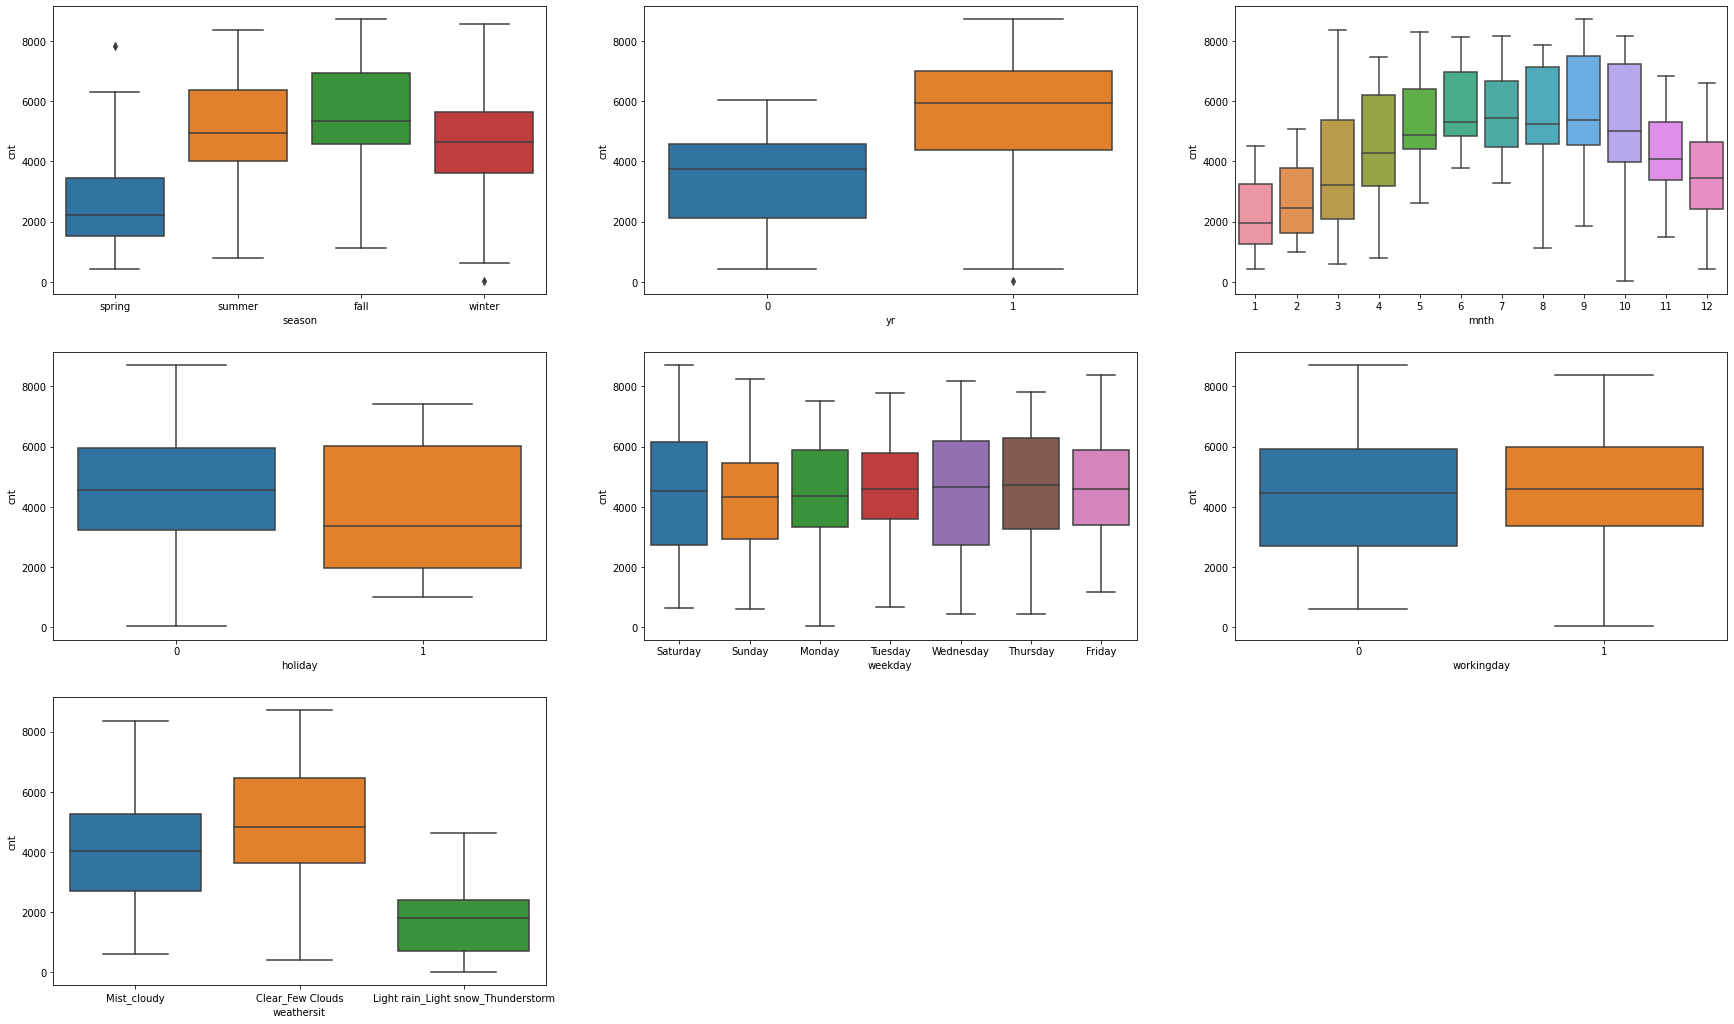

In [198]:
#boxplots for categorical variables
plt.figure(figsize=(30,18))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=bikes)
plt.subplot(3,3,2)
sns.boxplot(x="yr", y="cnt", data=bikes)
plt.subplot(3,3,3)
sns.boxplot(x="mnth", y="cnt", data=bikes)
plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", data=bikes)
plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", data=bikes)
plt.subplot(3,3,7)
sns.boxplot(x="weathersit", y="cnt", data=bikes)
plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=bikes)

**2019 has more bikes rented than previous year**

**The seasons summer and fall has more number of bikes rented**

**workingday column does not have much impact on target variable**

**April to November looks like busy time for renting**

**As expected clearer weather is optimal and thunderstorms not for bike rides**






In [199]:
bikes.dtypes

season         object
yr              int64
mnth            int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Dummy varaibles for categorical data

In [200]:
bikes['mnth']=bikes['mnth'].astype(object)
bikes['season']=bikes['season'].astype(object)
bikes['weathersit']=bikes['weathersit'].astype(object)
bikes['weekday']=bikes['weekday'].astype(object)
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [201]:
seasonsdummy = pd.get_dummies(bikes["season"], drop_first=True) 
seasonsdummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`
- `000` will correspond to `fall`

In [202]:
# Adding the results to the original dataframe
bikes = pd.concat([bikes, seasonsdummy], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600,1,0,0


In [203]:
#Following the same for remaining categorical variables
monthdummy = pd.get_dummies(bikes["mnth"], drop_first=True) 
bikes = pd.concat([bikes, monthdummy], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [204]:
weekdaydummy = pd.get_dummies(bikes["weekday"], drop_first=True) 
bikes = pd.concat([bikes, weekdaydummy], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,9,10,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [205]:
weatherdummy = pd.get_dummies(bikes["weathersit"], drop_first=True) 
bikes = pd.concat([bikes, weatherdummy], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [206]:
#dropping the old columns
bikes.drop(["season", "mnth", "weekday", "weathersit"], axis=1, inplace=True)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   atemp                               730 non-null    float64
 4   hum                                 730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   cnt                                 730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  2                                   730 non-null    uint8  
 11  3                                   730 non-n

### Data split for training


In [207]:
from sklearn.model_selection import train_test_split

#specifying seed to get same set of rows in test and training set
np.random.seed(0)
bikes_train, bikes_test= train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)


In [208]:
bikes_train.shape


(510, 29)

In [209]:
bikes_test.shape


(219, 29)

In [210]:
bikes_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Features Scaling

Here columns "atemp", "hum", "windspeed" and "cnt" columns are not in same range with other columns in dataset. So the coeffecients obtained after training will not be in same scale for comparision. Using normalization to scale the columns

In [213]:
#import min-max normalization module
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [214]:
#Appllying scaler() to previously mentioned columns
vars=['atemp','hum','windspeed','cnt']
bikes_train[vars]=scaler.fit_transform(bikes_train[vars])

In [215]:
bikes_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [216]:
bikes_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.084314,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.278131,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [217]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [218]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [219]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building linear model

** Using RFE select top 15 features

** backward selection remove columns

** if p value greater or check VIF is high

** remove condition satisfied columns

** again fit model check p and vIf


In [232]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [233]:
#Selecting top 15 predictors as of now
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('winter', True, 1),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (8, True, 1),
 (9, True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [235]:
#filtering the features that are rendered by rfe
X_train.columns[rfe.support_]

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy'],
      dtype='object')

In [236]:
X_train= X_train[X_train.columns[rfe.support_]]

In [237]:
#adding constant column for stats module usage 
X_train_modified = sm.add_constant(X_train)

In [238]:
#fitting the model
linear_model = sm.OLS(y_train.astype(float),X_train_modified.astype(float)).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.06e-186
Time:                        23:09:03   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**R-squared value indicates the model is a typical example of overfit.**

**The P values are all less than 0.05  so need to check VIF** 

**Need to look into multilinear collinearity.**

In [239]:
#VIF to check multicollinearity
vif = pd.DataFrame()
X = X_train.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
14,Mist_cloudy,2.26
0,yr,2.08
11,8,1.90
9,5,1.77
8,4,1.68


In [240]:
#dropping hum column with high VIF
X_train_rfe=X_train.drop(['hum'],axis=1)

In [241]:
#adding constant for sm model
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [242]:
linear_model = sm.OLS(y_train.astype(float),X_train_rfe1.astype(float)).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.75e-183
Time:                        23:10:42   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [243]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
10,8,1.86
9,6,1.64
8,5,1.60
13,Mist_cloudy,1.55
7,4,1.54


In [244]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [245]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
linear_model = sm.OLS(y_train,X_train_rfe2).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.90e-153
Time:                        23:12:13   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [246]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
12,Mist_cloudy,1.54
6,4,1.48
7,5,1.32
5,3,1.31
9,8,1.31
8,6,1.24


In [248]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [249]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
linear_model = sm.OLS(y_train,X_train_rfe3).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.96e-148
Time:                        23:13:42   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [250]:
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [251]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
linear_model = sm.OLS(y_train,X_train_rfe4).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.28e-149
Time:                        23:14:22   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [253]:
#dropping column 4 HAS A VERY HIGH p-value 
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [254]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
9,Mist_cloudy,1.36
3,3,1.22
6,8,1.12
4,5,1.10
7,9,1.10
5,6,1.06
1,holiday,1.03
8,Light rain_Light snow_Thunderstorm,1.02


In [255]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
linear_model = sm.OLS(y_train,X_train_rfe6).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.76e-149
Time:                        23:17:16   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**Model has R squared value > 0.75 which doesnt fall in overfit range and can go further for testing**

## Prediction 

In [258]:
y_train_cnt = linear_model.predict(X_train_rfe6)

In [259]:
#residual calculation
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

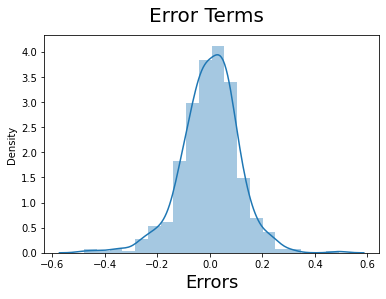

In [260]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [261]:
#test data scaling
num_vars=['atemp','hum','windspeed','cnt']
bikes_test[num_vars] = scaler.fit_transform(bikes_test[num_vars])

In [262]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [263]:
X_train_new=X_train_rfe6.drop(['const'], axis=1)

In [264]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [265]:
#prediction
y_pred = linear_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

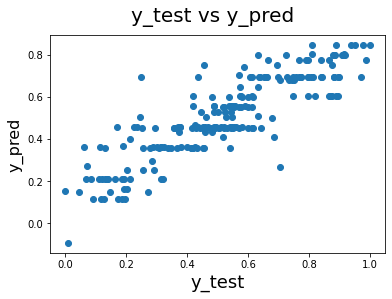

In [266]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

**Analyzed model is able to explain linear relationship of predictors with dependent variable to an good extent.**

In [268]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.12042489000153617

In [270]:
#r_squared for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.7443128084590649

### R_squared for training 0.764 and for test is 0.744 

## Checking Assumptions

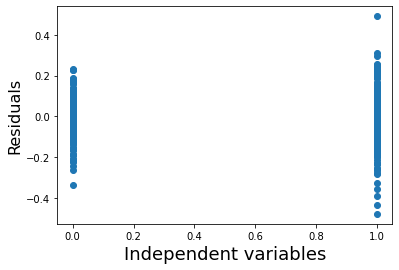

In [272]:
X_t=X_train_new.iloc[:,0].values
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

No vissible pattern

In [273]:
print(X_train_rfe6.columns)
print(linear_model.summary())

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.76e-149
Time:                        23:30:08   Log-Likelihood:                 406.38
No. Obse

###  linear regression equation is as follow

cnt= 0.2469 X yr - 0.916 X holiday - 02401 X Spring - 0.3039 X Light rain_Light snow_Thunderstorm - 0.0938 X Mist_Cloudy +0.045 X 3 + 0.0767 X 5 +0.1002 X 6 +0.1090 X 8 + 0.1488 X 9 +0.4493 X const